In [12]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
PremierLeague = pd.read_csv('EPL_20_21.csv')

In [3]:
PremierLeague.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

Check for missing values

In [4]:
PremierLeague.isnull().sum()
#There is no null value

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [13]:
PremierLeague.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


# Which club has the most aggresive defenders?

In [15]:
PremierLeague['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

Some players have 2 position

In [17]:
PremierLeague.loc[PremierLeague['Position'].str.contains('DF'),'Position'] ='DF'

In [18]:
#Creating new series for defenders on Premier League dataframe
defenders = PremierLeague[PremierLeague['Position']=='DF']

In [20]:
defenders.tail()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
524,Max Lowe,Sheffield United,ENG,DF,23,8,7,550,0,0,223,65.0,0,0,0.01,0.03,1,0
525,Phil Jagielka,Sheffield United,ENG,DF,37,10,6,526,0,0,186,76.3,0,0,0.00,0.00,1,1
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0
530,Antwoine Hackford,Sheffield United,ENG,DF,16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0
531,Femi Seriki,Sheffield United,ENG,DF,17,1,0,1,0,0,0,-1.0,0,0,0.00,0.00,0,0


In [25]:
defenders['Total_Cards'] = (defenders['Yellow_Cards'] + defenders['Red_Cards'])


<ipython-input-25-7644c14697b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders['Total_Cards'] = (defenders['Yellow_Cards'] + defenders['Red_Cards'])


In [106]:
defenders.head(3)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_Cards
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,3
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,3
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1,6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

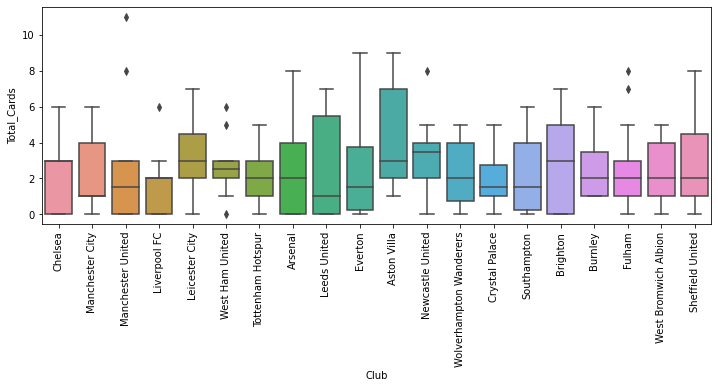

In [32]:
plt.figure(figsize=(12,4))
sns.boxplot(x='Club', y='Total_Cards', data=defenders)
plt.xticks(rotation=90)

Aston Villa has the highest percentile of total cards

In [39]:
av = defenders[defenders['Club']=='Aston Villa']
av
#Aston Villa has 7 DF players

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_Cards
265,Matt Targett,Aston Villa,ENG,DF,24,38,38,3404,0,2,2147,77.0,0,0,0.01,0.08,7,0,7
268,Tyrone Mings,Aston Villa,ENG,DF,27,36,36,3194,2,2,1585,79.6,0,0,0.05,0.02,6,1,7
269,Ezri Konsa,Aston Villa,ENG,DF,22,36,35,3196,2,0,1244,86.5,0,0,0.06,0.01,3,0,3
272,Matty Cash,Aston Villa,ENG,DF,22,28,28,2372,0,2,1298,73.9,0,0,0.01,0.08,8,1,9
278,Ahmed Elmohamady,Aston Villa,EGY,DF,32,14,8,839,0,0,594,78.1,0,0,0.05,0.07,2,0,2
279,Kortney Hause,Aston Villa,ENG,DF,25,7,7,630,1,0,216,78.2,0,0,0.17,0.00,2,0,2
286,Neil Taylor,Aston Villa,WAL,DF,31,1,0,16,0,0,11,90.9,0,0,0.00,0.00,1,0,1


In [37]:
av.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_Cards
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.000000,7.000000,7.000000,7.000000,7.000000
mean,26.142857,22.857143,21.714286,1950.142857,0.714286,0.857143,1013.571429,80.600000,0.0,0.0,0.050000,0.037143,4.142857,0.285714,4.428571
std,4.059087,15.323496,16.131897,1420.641220,0.951190,1.069045,770.551503,5.940819,0.0,0.0,0.058023,0.037733,2.794553,0.487950,3.154739
min,22.000000,1.000000,0.000000,16.000000,0.000000,0.000000,11.000000,73.900000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,1.000000
25%,23.000000,10.500000,7.500000,734.500000,0.000000,0.000000,405.000000,77.550000,0.0,0.0,0.010000,0.005000,2.000000,0.000000,2.000000
50%,25.000000,28.000000,28.000000,2372.000000,0.000000,0.000000,1244.000000,78.200000,0.0,0.0,0.050000,0.020000,3.000000,0.000000,3.000000
75%,29.000000,36.000000,35.500000,3195.000000,1.500000,2.000000,1441.500000,83.050000,0.0,0.0,0.055000,0.075000,6.500000,0.500000,7.000000
max,32.000000,38.000000,38.000000,3404.000000,2.000000,2.000000,2147.000000,90.900000,0.0,0.0,0.170000,0.080000,8.000000,1.000000,9.000000


In [38]:
defenders.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_Cards
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,25.651376,18.527523,16.321101,1464.545872,0.756881,0.834862,882.977064,80.320183,0.018349,0.022936,0.049450,0.046009,2.440367,0.133028,2.573394
std,4.262960,11.314591,11.651531,1023.934037,1.148260,1.521058,694.539701,12.368745,0.213880,0.278949,0.088623,0.058216,2.261402,0.353665,2.374331
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,6.000000,557.000000,0.000000,0.000000,270.750000,76.200000,0.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000
50%,26.000000,19.000000,15.000000,1388.500000,0.000000,0.000000,756.000000,81.450000,0.000000,0.000000,0.035000,0.020000,2.000000,0.000000,2.000000
75%,29.000000,28.000000,27.000000,2365.250000,1.000000,1.000000,1386.250000,87.350000,0.000000,0.000000,0.060000,0.070000,4.000000,0.000000,4.000000
max,37.000000,38.000000,38.000000,3409.000000,8.000000,8.000000,3214.000000,100.000000,3.000000,4.000000,1.160000,0.310000,11.000000,2.000000,11.000000


EPL Avergage Total Cards for all Defenders is 2.57, Aston Villa's Defenders averaged 4.42. I took a look at the 'mean' row and 'Total_Cards' columns

In [58]:
#which AV player has most cards
av[av['Total_Cards']==av['Total_Cards'].max()] 

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_Cards
272,Matty Cash,Aston Villa,ENG,DF,22,28,28,2372,0,2,1298,73.9,0,0,0.01,0.08,8,1,9


Matty Cash is the most aggresive player on the Aston Villa 

# Who are the top 10 most aggressive defenders in the EPL?

In [60]:
top_10_agg = defenders.nlargest(10,'Total_Cards')
top_10_agg

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Total_Cards
53,Harry Maguire,Manchester United,ENG,DF,27,34,34,3047,2,1,2139,89.0,0,0,0.06,0.01,11,0,11
242,Mason Holgate,Everton,ENG,DF,23,28,26,2287,1,0,1200,78.8,0,0,0.03,0.03,9,0,9
272,Matty Cash,Aston Villa,ENG,DF,22,28,28,2372,0,2,1298,73.9,0,0,0.01,0.08,8,1,9
55,Luke Shaw,Manchester United,ENG,DF,25,32,30,2654,1,5,2015,81.6,0,0,0.02,0.18,8,0,8
185,Granit Xhaka,Arsenal,SUI,DF,27,31,29,2522,1,2,2164,89.9,0,0,0.03,0.06,7,1,8
189,Héctor Bellerín,Arsenal,ESP,DF,25,25,24,2089,1,2,1302,82.9,0,0,0.04,0.10,8,0,8
294,Isaac Hayden,Newcastle United,ENG,DF,25,24,22,1942,0,0,790,79.6,0,0,0.02,0.02,8,0,8
451,Joachim Andersen,Fulham,DEN,DF,24,31,30,2730,1,1,1833,83.4,0,0,0.04,0.02,7,1,8
509,John Egan,Sheffield United,IRL,DF,27,31,30,2629,0,1,1094,84.6,0,0,0.02,0.01,7,1,8
111,Jonny Evans,Leicester City,NIR,DF,32,28,28,2473,2,2,1764,87.5,0,0,0.06,0.01,7,0,7


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Harry Maguire'),
  Text(1, 0, 'Mason Holgate'),
  Text(2, 0, 'Matty Cash'),
  Text(3, 0, 'Luke Shaw'),
  Text(4, 0, 'Granit Xhaka'),
  Text(5, 0, 'Héctor Bellerín'),
  Text(6, 0, 'Isaac Hayden'),
  Text(7, 0, 'Joachim Andersen'),
  Text(8, 0, 'John Egan'),
  Text(9, 0, 'Jonny Evans')])

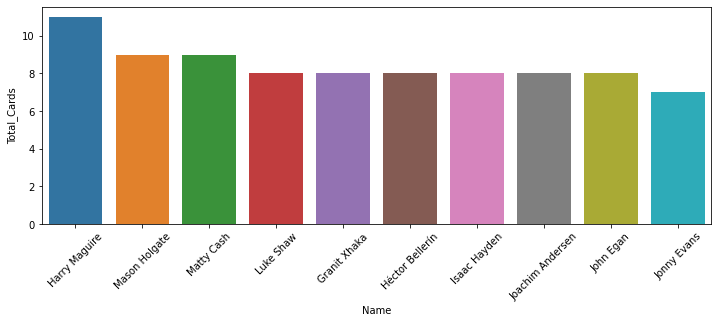

In [66]:
plt.figure(figsize=(12,4))
sns.barplot(x='Name',y='Total_Cards',data=top_10_agg)
plt.xticks(rotation=45)

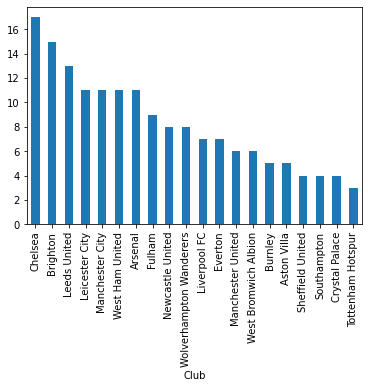

In [86]:
defenders['Goals'].groupby(defenders['Club']).sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

Chelsea are the club with the most goals scored by a defender (17)

## Which Defender scored most?

In [89]:
defenders[['Name','Club','Goals']].nlargest(1,'Goals')

,Name,Club,Goals
212,Stuart Dallas,Leeds United,8


In [94]:
team_assist = PremierLeague['Assists'].groupby(PremierLeague['Club']).sum().sort_values(ascending=False)
print(team_assist)

Club
Manchester City            55
Manchester United          51
Tottenham Hotspur          50
West Ham United            46
Leicester City             45
Leeds United               45
Liverpool FC               43
Aston Villa                38
Chelsea                    38
Arsenal                    38
Southampton                33
Everton                    32
Crystal Palace             29
Newcastle United           26
Brighton                   24
Wolverhampton Wanderers    21
Burnley                    20
West Bromwich Albion       20
Fulham                     18
Sheffield United           13
Name: Assists, dtype: int64


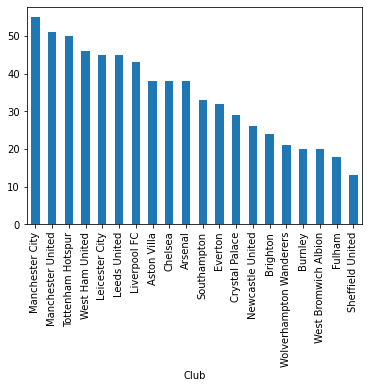

In [104]:
team_assist.plot(kind='bar')
plt.show()